In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from QQ_MERGE import merge_point_data as merg

In [2]:
gome2a = xr.open_dataarray('/home/user/Desktop/AMRITHA/NO2_GOME2A.nc').sel(time=slice('2007','122014'))
gome2a1 = gome2a.where(gome2a>0, np.nan).mean(dim=['lat','lon'])

gome2b = xr.open_dataarray('/home/user/Desktop/AMRITHA/NO2_GOME2B.nc').sel(time=slice('2013','122019'))
gome2b1 = gome2b.where(gome2b>0, np.nan).mean(dim=['lat','lon'])

In [3]:
###older instrument
old = gome2a1

###new instrument
new = gome2b1

###Merging the data
res = merg.merged_time_series(old, new)

Text(0.05, 0.63, 'New instrument Data')

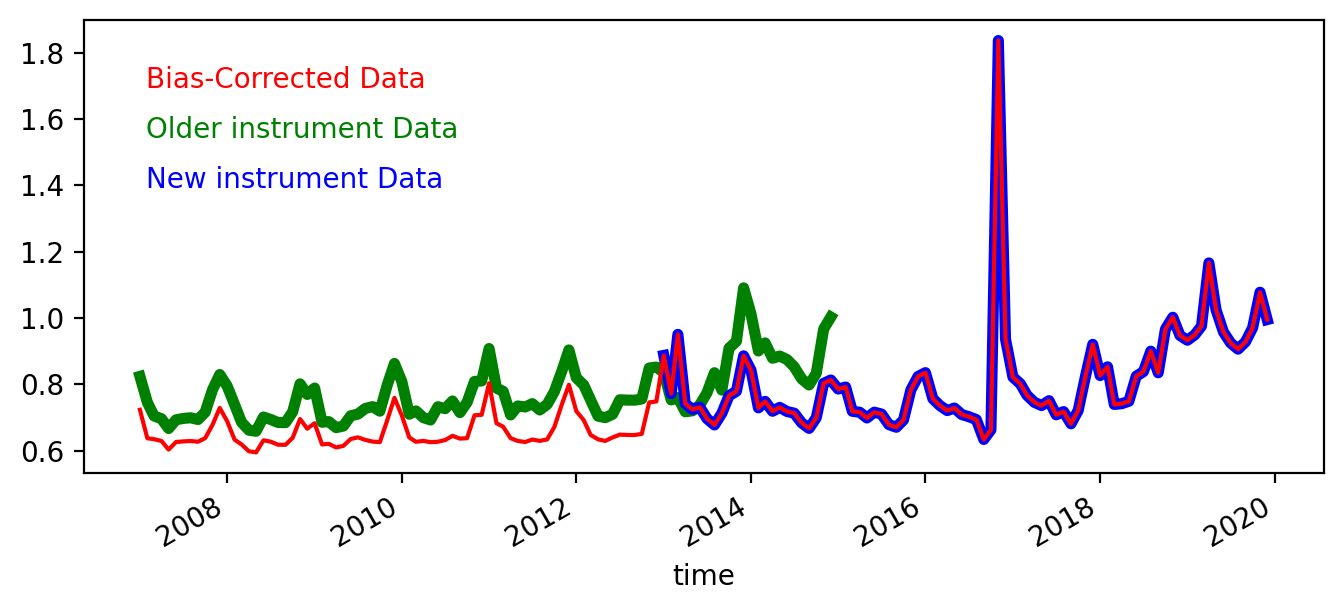

In [4]:
plt.figure(figsize=(8,3), dpi=200)
old.plot(c='green', linewidth=4)
new.plot(c='blue', linewidth=4)
res.plot(c='red')


plt.text(0.05,0.85,'Bias-Corrected Data', transform=(plt.gca()).transAxes, fontsize=10, c='red')
plt.text(0.05,0.74,'Older instrument Data', transform=(plt.gca()).transAxes, fontsize=10, c='green')
plt.text(0.05,0.63,'New instrument Data', transform=(plt.gca()).transAxes, fontsize=10, c='blue',)